In [1]:
import matplotlib.pyplot as plt
import glob
import pickle
from collections import defaultdict
import pandas as pd
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
sns.set_theme(style="whitegrid")

In [3]:
data = defaultdict(lambda: [])

files = glob.glob('trained_model/feature_compare/*/meta.p')
for file in files:
    meta = pickle.load(open(file, "rb"))
    algo = re_find('m_(.+?)_f_', file)
    features = re_find('f_(.+?)_r_', file)
    run = re_find('_r_(.+?)_c_', file)
    cor = re_find('c_(.+?)/', file)
    
    data['Model'].append(algo)
    data['Features'].append(features)
    
    data['Run'].append(run)
    data['FeatureCorrelation'].append(cor)
    
    data['Error'].append(meta['error_mse'])

df = pd.DataFrame(dict(data))
df

,Model,Features,Run,FeatureCorrelation,Error
0,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95,0.019159
1,M4KNeighborsCosineRegressor,Catch22,11,0.6,0.023664
2,M4KerasNetRegressionModel,"TSFresh,TSFreshDiff,TSFreshLog",1,0.6,0.014392
3,M4KerasNetRegressionModel,Catch22,15,0.7,0.021584
4,M4DummyMeanRegression,Catch22,7,0.95,0.033467
...,...,...,...,...,...
4006,M4KNeighborsCosineRegressor,TSFresh,1,0.9,0.016262
4007,M4RandomForestRegressor,"Catch22,Catch22Diff,Catch22Log",3,0.7,0.018665
4008,M4KNeighborsRegressor,"TSFresh,Catch22",3,0.7,0.018586
4009,M4KNeighborsRegressor,TSFresh,14,0.95,0.016266


In [4]:
#df[(df['Features']=='Catch22')]['Model'].unique()

In [5]:
figures_directory = 'figures'
create_directory_if_not_exist(figures_directory)
fig_x_lim = [0, 0.035]

In [6]:
df['Features'].unique()

array(['Catch22,Catch22Diff,Catch22Log', 'Catch22',
       'TSFresh,TSFreshDiff,TSFreshLog', 'TSFresh', 'TSFresh,Catch22'],
      dtype=object)

In [7]:
def plotify_df(df):
    df = df.copy(deep=True)

    algo_map = get_meta_model_name_map()
    correlation_map = get_correlation_map()
    feature_set_map = get_feature_set_map()

    df['Model'] = df['Model'].map(algo_map)
    df['FeatureCorrelation'] = df['FeatureCorrelation'].map(correlation_map)
    df['Features'] = df['Features'].map(feature_set_map)
    return df

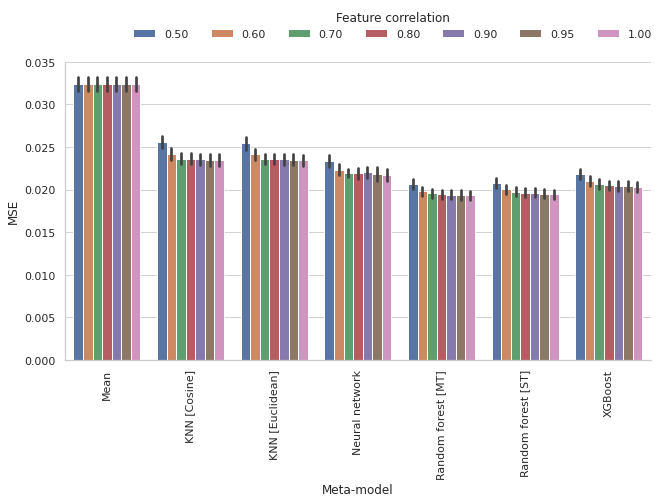

In [8]:
g = sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='Catch22')].sort_values(['Model', 'FeatureCorrelation']).pipe(plotify_df),
            kind = "bar", ci='sd')
g.fig.set_size_inches(15, 5)
plt.xticks(rotation=90)
plt.grid(axis='y', color='lightgray')
plt.ylim(fig_x_lim)
plt.ylabel('MSE')
plt.xlabel('Meta-model')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=7, title='Feature correlation', frameon=False)
plt.savefig(f'{figures_directory}/performance_Catch22.pdf', bbox_inches='tight', pad_inches=0)

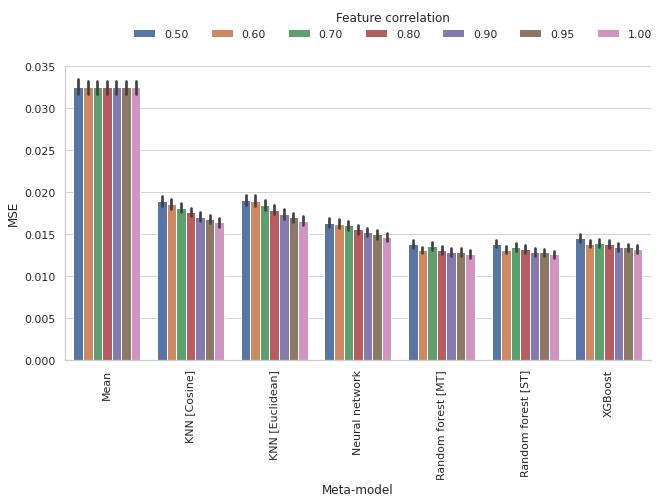

In [9]:
g = sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='TSFresh')].sort_values(['Model', 'FeatureCorrelation']).pipe(plotify_df),
            kind = "bar", ci='sd')
g.fig.set_size_inches(15, 5)
plt.xticks(rotation=90)
plt.grid(axis='y', color='lightgray')
plt.ylim(fig_x_lim)
plt.ylabel('MSE')
plt.xlabel('Meta-model')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=7, title='Feature correlation', frameon=False)
plt.savefig(f'{figures_directory}/performance_TSFresh.pdf', bbox_inches='tight', pad_inches=0)

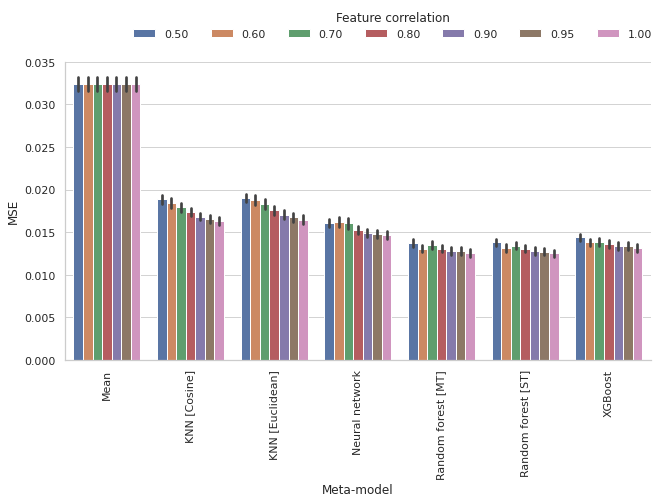

In [10]:
g = sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='TSFresh,Catch22')].sort_values(['Model', 'FeatureCorrelation']).pipe(plotify_df),
            kind = "bar", ci='sd')
g.fig.set_size_inches(15, 5)
plt.xticks(rotation=90)
plt.grid(axis='y', color='lightgray')
plt.ylim(fig_x_lim)
plt.ylabel('MSE')
plt.xlabel('Meta-model')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=7, title='Feature correlation', frameon=False)
plt.savefig(f'{figures_directory}/performance_TSFresh,Catch22.pdf', bbox_inches='tight', pad_inches=0)

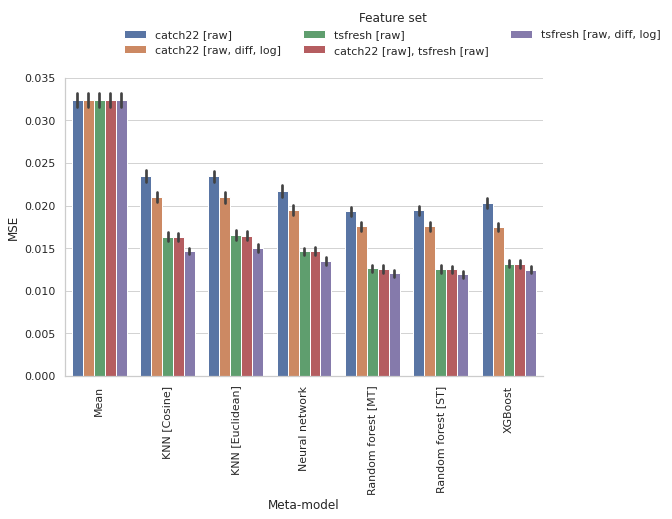

In [11]:
g = sns.catplot(x = "Model",
            y = "Error",
            hue = "Features",
            data = df[(df['FeatureCorrelation']=='1.0')].sort_values(['Model', 'Features']).pipe(plotify_df),#.sort_values('Features'),
            kind = "bar", ci='sd')
g.fig.set_size_inches(15, 5)
plt.xticks(rotation=90)
plt.grid(axis='y', color='lightgray')
plt.ylim(fig_x_lim)
plt.ylabel('MSE')
plt.xlabel('Meta-model')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Feature set', frameon=False)
plt.savefig(f'{figures_directory}/performance_FeatureCorrelation_1_0.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
#df[(df['Features']=='TSFresh') & (df['Model']=='M4KerasNetRegressionModel')]

In [13]:
#df['Model'].unique()